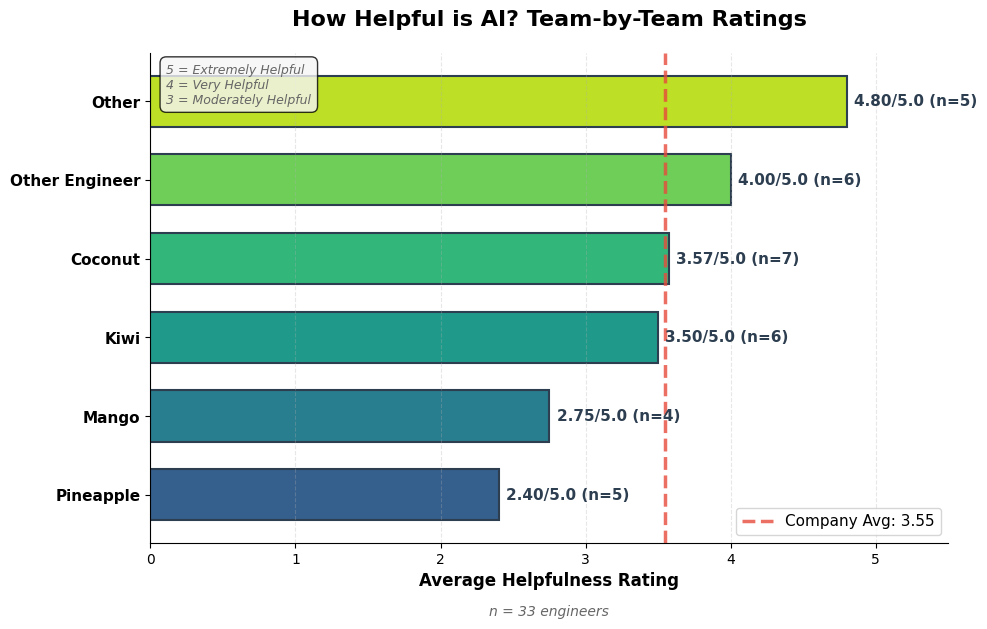


AI HELPFULNESS BY TEAM - SUMMARY

📊 Overall Company Average: 3.55/5.0

⭐ Team Rankings (by average helpfulness):
   1. Other: 4.80/5.0 (n=5) - Extremely Helpful (+1.25)
   2. Other Engineer: 4.00/5.0 (n=6) - Very Helpful (+0.45)
   3. Coconut: 3.57/5.0 (n=7) - Very Helpful (+0.03)
   4. Kiwi: 3.50/5.0 (n=6) - Very Helpful (-0.05)
   5. Mango: 2.75/5.0 (n=4) - Moderately Helpful (-0.80)
   6. Pineapple: 2.40/5.0 (n=5) - Slightly Helpful (-1.15)

✨ Key Insights:
   • 55% of engineers rate AI as 'Very' or 'Extremely' Helpful
   • Average rating across all teams: 3.55/5.0
   • All teams rate AI above 'Moderately Helpful' (3.0)
   • Highest rated team: Other (4.80)
   • Lowest rated team: Pineapple (2.40)




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get the relevant columns
team_col = 'Which team are you a part of?'
helpfulness_col = 'On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?'

# Create numeric mapping for helpfulness
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Calculate average helpfulness by team
team_helpfulness = df_filtered.groupby(team_col)['rating_numeric'].agg(['mean', 'count']).reset_index()
team_helpfulness = team_helpfulness.sort_values('mean', ascending=True)

# Calculate overall average
overall_avg = df_filtered['rating_numeric'].mean()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.4))

# Modern appealing color gradient (Purple to Blue)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(team_helpfulness)))
# Alternative palettes:
# colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(team_helpfulness)))  # Purple-pink
# colors = plt.cm.cool(np.linspace(0.2, 0.8, len(team_helpfulness)))  # Cyan-purple

bars = ax.barh(range(len(team_helpfulness)), team_helpfulness['mean'], 
                color=colors, height=0.65, edgecolor='#2C3E50', linewidth=1.5)

# Add value labels
for i, (bar, avg, count) in enumerate(zip(bars, team_helpfulness['mean'], team_helpfulness['count'])):
    ax.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
            f'{avg:.2f}/5.0 (n={int(count)})', 
            va='center', fontsize=11, weight='bold', color='#2C3E50')

# Add overall average line
ax.axvline(overall_avg, color='#E74C3C', linestyle='--', linewidth=2.5, 
           alpha=0.8, label=f'Company Avg: {overall_avg:.2f}')

ax.set_yticks(range(len(team_helpfulness)))
ax.set_yticklabels(team_helpfulness[team_col], fontsize=11, weight='bold')
ax.set_xlabel('Average Helpfulness Rating', fontsize=12, weight='bold')
ax.set_title('How Helpful is AI? Team-by-Team Ratings', fontsize=16, weight='bold', pad=20)
ax.set_xlim(0, 5.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=11, loc='lower right')
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add rating scale reference
ax.text(0.02, 0.98, '5 = Extremely Helpful\n4 = Very Helpful\n3 = Moderately Helpful', 
         transform=ax.transAxes, ha='left', va='top',
         fontsize=9, style='italic', color='#666666',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', alpha=0.8))

# Add subtitle
plt.text(0.5, -0.15, f'n = {len(df_filtered)} engineers', 
         ha='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("AI HELPFULNESS BY TEAM - SUMMARY")
print("="*80)

print(f"\n📊 Overall Company Average: {overall_avg:.2f}/5.0")

print(f"\n⭐ Team Rankings (by average helpfulness):")
for i, (_, row) in enumerate(team_helpfulness.sort_values('mean', ascending=False).iterrows(), 1):
    team = row[team_col]
    avg = row['mean']
    count = int(row['count'])
    
    # Determine rating label
    if avg >= 4.5:
        rating_label = "Extremely Helpful"
    elif avg >= 3.5:
        rating_label = "Very Helpful"
    elif avg >= 2.5:
        rating_label = "Moderately Helpful"
    else:
        rating_label = "Slightly Helpful"
    
    diff_from_avg = avg - overall_avg
    comparison = f"(+{diff_from_avg:.2f})" if diff_from_avg > 0 else f"({diff_from_avg:.2f})"
    
    print(f"   {i}. {team}: {avg:.2f}/5.0 (n={count}) - {rating_label} {comparison}")

# Calculate high ratings percentage
high_ratings = df_filtered[df_filtered[helpfulness_col].isin(['Extremely Helpful', 'Very Helpful'])]
high_ratings_pct = (len(high_ratings) / len(df_filtered)) * 100

print(f"\n✨ Key Insights:")
print(f"   • {high_ratings_pct:.0f}% of engineers rate AI as 'Very' or 'Extremely' Helpful")
print(f"   • Average rating across all teams: {overall_avg:.2f}/5.0")
print(f"   • All teams rate AI above 'Moderately Helpful' (3.0)")
print(f"   • Highest rated team: {team_helpfulness.iloc[-1][team_col]} ({team_helpfulness.iloc[-1]['mean']:.2f})")
print(f"   • Lowest rated team: {team_helpfulness.iloc[0][team_col]} ({team_helpfulness.iloc[0]['mean']:.2f})")

print("\n" + "="*80 + "\n")